Sample of master dataset:
  Nasdaq Traded Symbol                                      Security Name  \
0             Y      A            Agilent Technologies, Inc. Common Stock   
1             Y     AA                    Alcoa Corporation Common Stock    
2             Y   AAAU                       Perth Mint Physical Gold ETF   
3             Y   AACG  ATA Creativity Global - American Depositary Sh...   
4             Y   AADR                AdvisorShares Dorsey Wright ADR ETF   

  Listing Exchange Market Category ETF  Round Lot Size Test Issue  \
0                N                   N           100.0          N   
1                N                   N           100.0          N   
2                P                   Y           100.0          N   
3                Q               G   N           100.0          N   
4                P                   Y           100.0          N   

  Financial Status CQS Symbol NASDAQ Symbol NextShares  
0              NaN          A          

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 1.4809e-04 - val_loss: 4.2042e-04
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.9265e-06 - val_loss: 6.1725e-04
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.8608e-06 - val_loss: 3.7882e-04
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.0920e-06 - val_loss: 3.3355e-04
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.9757e-06 - val_loss: 4.1815e-04
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.6961e-06 - val_loss: 3.3708e-04
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.6372e-06 - val_loss: 2.5921e-04
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.0956e-06 - val_loss: 5.8619e-04
Epoch 9/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.4126e-06 - val_loss: 3.4111e-04
Epoch 10/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3.3183e-06 - val_loss: 5.1107e-04
Epoch 11/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss

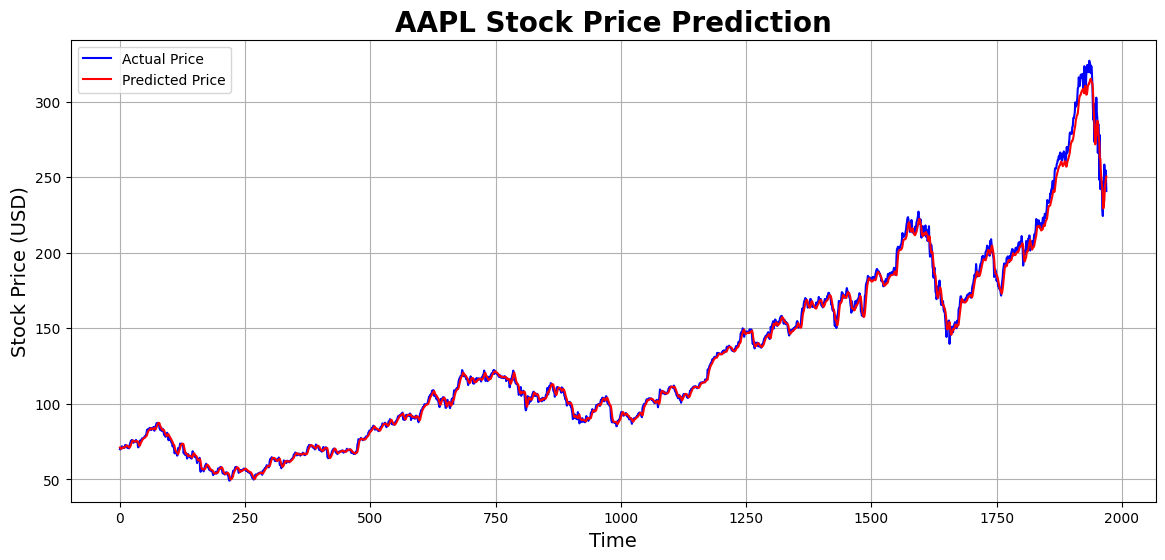

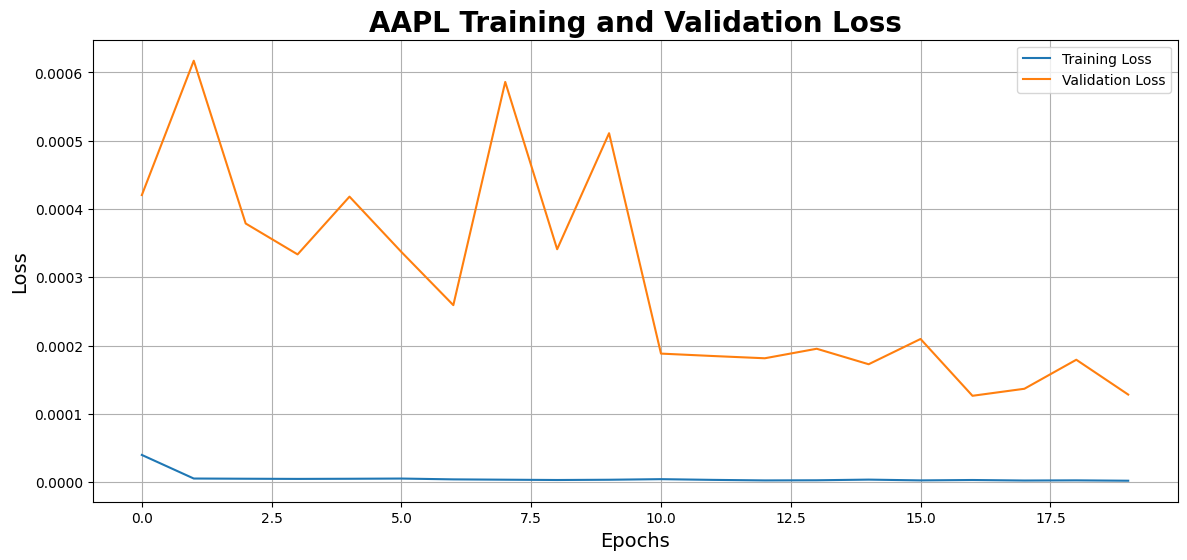

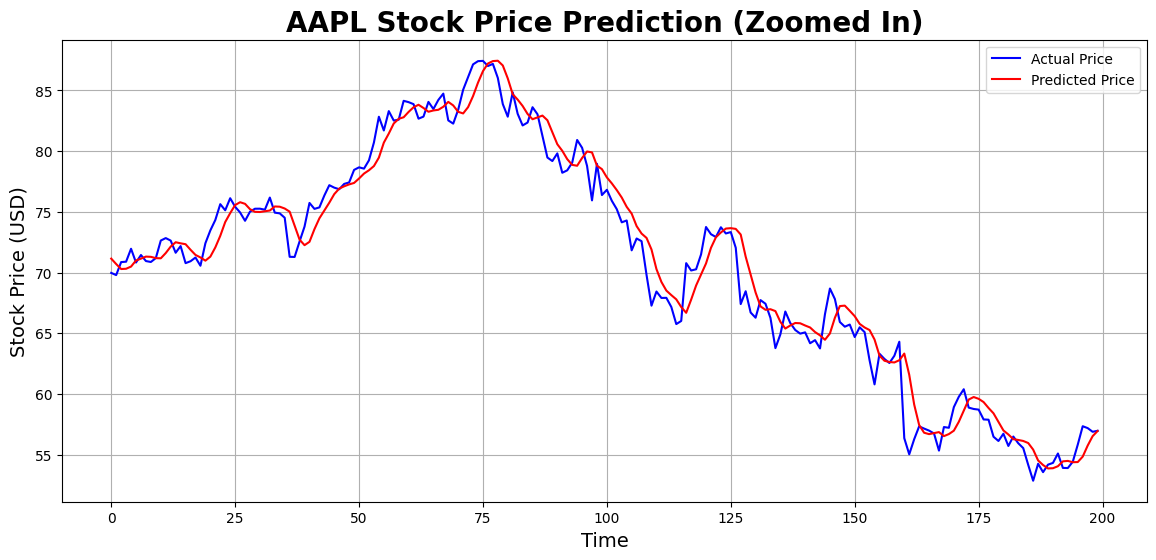

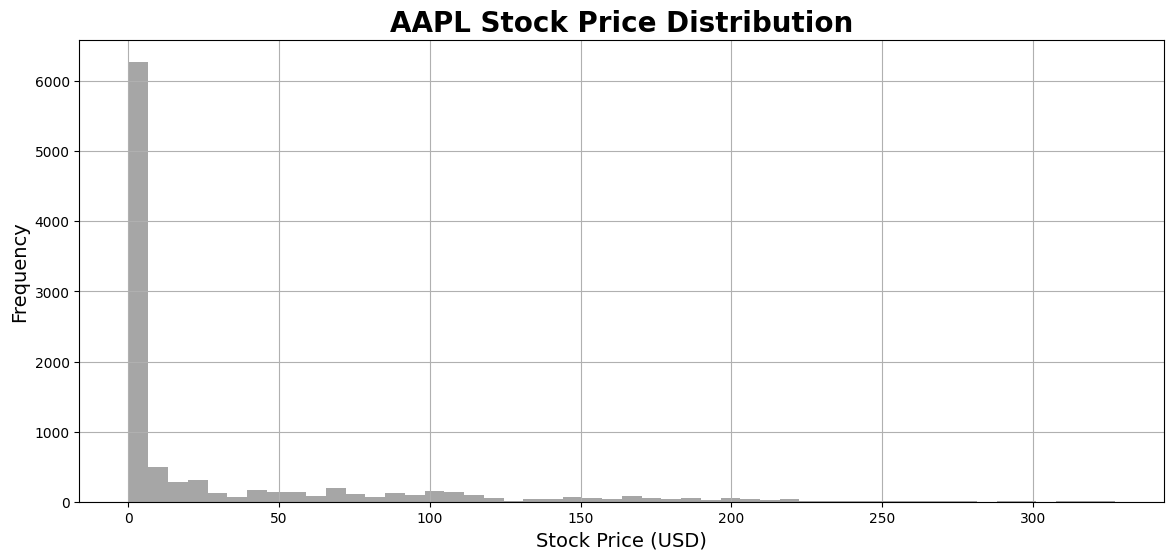


Model Evaluation Metrics:
MSE: 13.71, RMSE: 3.70


In [3]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

# Step 2: Load Main Master Dataset
master_data = pd.read_csv('D:\\Future Intern\\Task-2\\symbols_valid_meta.csv')  # update path if needed
print("Sample of master dataset:")
print(master_data.head())

# Step 3: Choose a Symbol to Work With
symbol = 'AAPL'  # You can choose dynamically as well

# Step 4: Check if symbol exists in master
if symbol not in master_data['Symbol'].values:
    raise Exception(f"Symbol '{symbol}' not found in master stock list!")

# Step 5: Detect whether it's an ETF or Stock
etf_path = f"D:\\Future Intern\\Task-2\\etfs\\{symbol}.csv"
stock_path = f"D:\\Future Intern\\Task-2\\stocks\\{symbol}.csv"

if os.path.exists(etf_path):
    print(f"{symbol} detected in ETF folder.")
    data_path = etf_path
elif os.path.exists(stock_path):
    print(f"{symbol} detected in Stock folder.")
    data_path = stock_path
else:
    raise Exception(f"No data file found for {symbol} in etfs or stocks folders!")

# Step 6: Load the Symbol's Historical Data
data = pd.read_csv(data_path)
print("\nSample of selected symbol data:")
print(data.head())

# Step 7: Preprocess
# Use 'Adj Close' for modeling
close_prices = data['Adj Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

# Create sequences
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 8: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 10: Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 11: Plot Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(real_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='red')
plt.title(f'{symbol} Stock Price Prediction', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price (USD)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Step 12: Plot Training and Validation Loss
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'{symbol} Training and Validation Loss', fontsize=20, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Step 13: Zoom In on a Range (e.g., first 200 days of testing data)
plt.figure(figsize=(14, 6))
plt.plot(real_prices[:200], label='Actual Price', color='blue')
plt.plot(predicted_prices[:200], label='Predicted Price', color='red')
plt.title(f'{symbol} Stock Price Prediction (Zoomed In)', fontsize=20, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price (USD)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Step 14: Distribution of Stock Prices (Before Scaling)
plt.figure(figsize=(14, 6))
plt.hist(close_prices, bins=50, color='gray', alpha=0.7)
plt.title(f'{symbol} Stock Price Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Stock Price (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Step 15: Evaluate the model
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
print(f"\nModel Evaluation Metrics:\nMSE: {mse:.2f}, RMSE: {rmse:.2f}")
